#  `radial_density_distribution`

Calculates the radial density distribution by analyzing the voxels value in the distance transform, which indicate the radius of the largest sphere that can be inserted at each voxels. Note that this differs from `pore_size_distribution`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
from edt import edt
import inspect
inspect.signature(ps.metrics.radial_density_distribution)

<Signature (dt, bins=10, log=False, voxel_size=1)>

## `dt`
The input image containing the distance transform map of the void space. The euclidean distance map can be calculated by `edt` method.

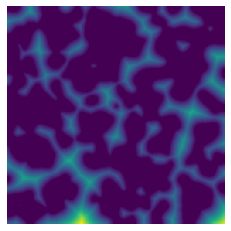

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[500, 500])
dt = edt(im)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(dt, origin='lower', interpolation='none')
ax.axis(False);

Now we can calculate the radial density distributions in the test image. `radial_density_distribution` returns a custom object with information of the histogram.

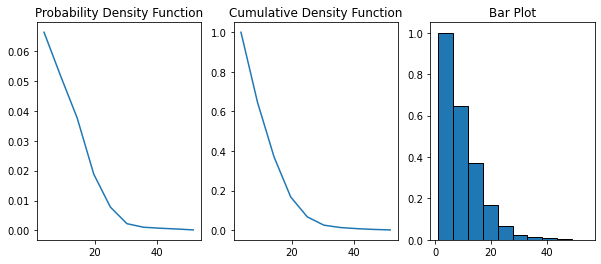

In [3]:
data = ps.metrics.radial_density_distribution(dt=dt)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.bin_centers,data.pdf)
ax[1].plot(data.bin_centers,data.cdf)
ax[2].bar(data.bin_centers, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `bins`

The default number of bins for the histogram is 10. Let's increase the bins to 100:

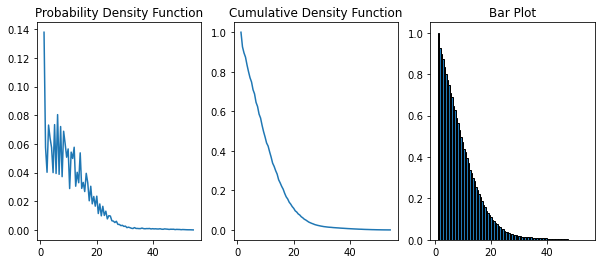

In [5]:
data = ps.metrics.radial_density_distribution(dt=dt, bins=100)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.bin_centers,data.pdf)
ax[1].plot(data.bin_centers,data.cdf)
ax[2].bar(data.bin_centers, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `log`

By default, the histogram binning is based on sizes. We can calculate the size distribution base on log(size) with `log=True`. The resulting histogram binning is then performed on the logarith of size values.

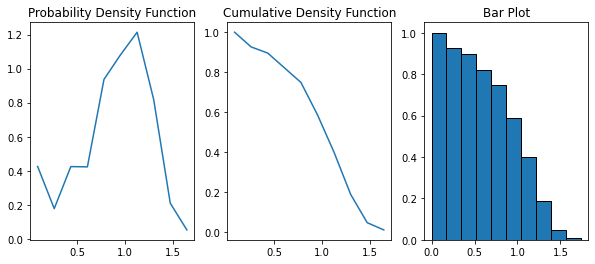

In [8]:
data = ps.metrics.radial_density_distribution(dt=dt, log=True)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.bin_centers,data.pdf)
ax[1].plot(data.bin_centers,data.cdf)
ax[2].bar(data.bin_centers, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `voxel_size`

By default the voxel_size is 1. We can assign voxel size of the image as the input or apply the scaling on the results after the fact:

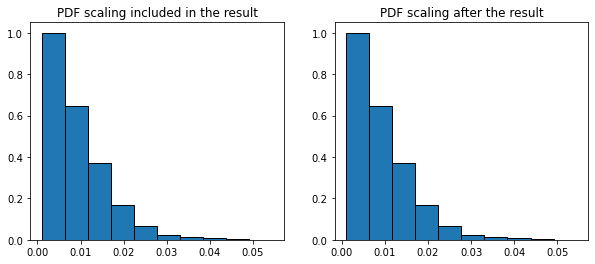

In [10]:
voxel_size=1e-3
data = ps.metrics.radial_density_distribution(dt=dt, voxel_size=voxel_size, log=False)
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].bar(data.bin_centers, data.cdf, data.bin_widths, edgecolor='k');
ax[0].set_title("PDF scaling included in the result");
data = ps.metrics.radial_density_distribution(dt=dt, log=False)
ax[1].bar(data.bin_centers*voxel_size, data.cdf, data.bin_widths*voxel_size, edgecolor='k');
ax[1].set_title("PDF scaling after the result");